# 01 Nov 2022 - Signal Deconstruction

We have started to show that we can take waves of any periodicity and deconstruct them to understand their properties. We have only conceptually done so for more general $V(t)$'s. We are using $V(t)$ because everything is a voltage. But now we introduce the toolkit that can help us do this. 

For a given $V(t)$ with some base periodicity ($w_0$ or $T_0$), really the longest period or lowest frequency in the signal, we can use a Fourier Series to decompose those signals in terms of harmonics ($n\;\omega_0$) of the base frequency. The model of this decomposition is given by the [infinite series](https://en.wikipedia.org/wiki/Fourier_series#Sine-cosine_form):

$f(t) = \dfrac{a_0}{2} + \sum_{n=1}^{\infty} a_n \cos(n\omega_0t) + b_n \sin(n\omega_0t)$

Or

$f(t) = \dfrac{a_0}{2} + \sum_{n=1}^{\infty} a_n \cos\left(\dfrac{2n\pi}{T_0}t\right) + b_n \sin\left(\dfrac{2n\pi}{T_0}t\right)$

By using the [orthogonal nature](https://en.wikipedia.org/wiki/Orthogonal_functions) of $\sin$ and $\cos$ over one period, we can find the unknown coefficients for a given signal $V(t)$. 

## DC Offset

The first term in the sum is just related to the DC offset, that is the average of the signal over one period. That's because $sin$ and $cos$ don't shift the average (they have a time average of zero, remember?)

$\dfrac{a_0}{2} = \dfrac{1}{T_0}\int_{T_0} f(t) dt$

## Periodic Models

For the periodicity, we use "Fourier's Trick" to determine the value of the coefficients. *Note that you need the signal $V(t)$ to complete this work.* And this isn't a trick, it's a well-established method.

$a_n = \dfrac{2}{T_0}\int_{T_0}V(t)\cos(n\omega_0t)\qquad n\neq0$

$b_n = \dfrac{2}{T_0}\int_{T_0}V(t)\sin(n\omega_0t)\qquad n\neq0$

Given this, our approximate $V(t)$ is given up to the $N$ term is,

$V(t) \approx \dfrac{a_0}{2} + \sum_{n=1}^{N} a_n \cos(n\omega_0t) + b_n \sin(n\omega_0t)$

## Example: The Duty Cycle

There are many signals we could analyze, but one of the common (and more mathematically tractable) ones is the [Duty Cycle](https://en.wikipedia.org/wiki/Duty_cycle). In fact, this signal is in wide use across electrical devices for timed on and off states. Moreover, the behaviors of some neurons and muscle fibers have been shown to approximate duty cycle firing. Synthesizers and electronic music are similar heavy users of [pulse width modulation](https://en.wikipedia.org/wiki/Pulse-width_modulation), which stems from this signal.

Below, we import a few libraries and plot the duty cycle.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
%matplotlib inline

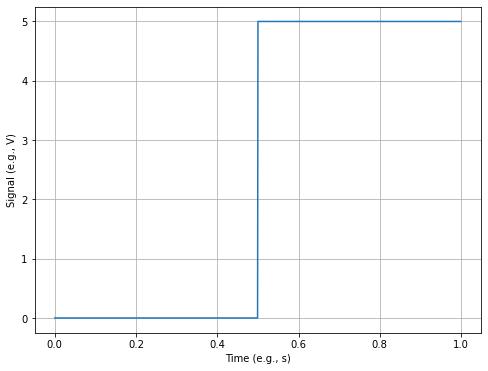

In [2]:
## Setting up a few parameters

V = 5       ## Max Voltage for the cycle
T = 1       ## Period of the cycle
N = 1000    ## Number of discrete points in model
dt = T/N    ## Spacing in time between points

## Create a time array
t = np.linspace(0, T, N, endpoint=False)

fig = plt.figure(figsize=(8,6))

## Plot a 0V-5V duty cycle
## We are using the signal library, which will also give 
## us access to FFT!
squareWave = V/2-V/2*sig.square(2 * np.pi * t)

plt.plot(t, squareWave)

plt.xlabel('Time (e.g., s)')
plt.ylabel('Signal (e.g., V)')
plt.grid()

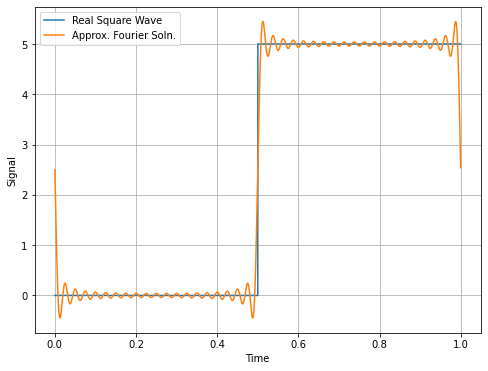

In [41]:
def ComputeBn(V,n_array):
    
    bn_array = (V/(n_array*np.pi))*(np.cos(n_array*np.pi)-1)
    
    return bn_array

def ComputeV(V,T,n,t):
    
    V_array = np.ones(len(t))*V/2

    for i in range(0,n):
    
        V_add = bns[i]*np.sin(2*np.pi*(i+1)/T*t)
        V_array += V_add
        
    return V_array

n = 40
n_array = np.arange(1, n+1)   
bns = ComputeBn(V, n_array)
V_array = ComputeV(V, T, n, t)

fig = plt.figure(figsize=(8,6))
plt.plot(t, squareWave, label='Real Square Wave')
plt.plot(t, V_array, label='Approx. Fourier Soln.')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.grid()
plt.legend()


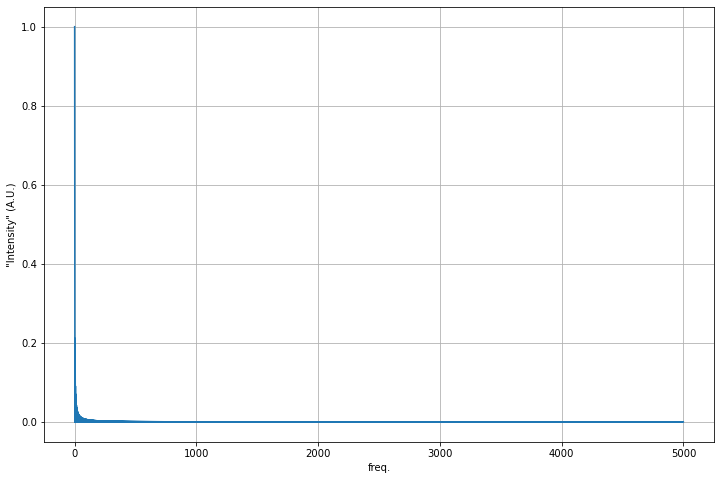

In [42]:
from scipy.fft import fft, ifft, fftfreq ## Import what we need

yf = fft(squareWave)
xf = fftfreq(N,dt)

## Let's cut out the half we want:
xf_pos = xf[0:N//2]         ## Returns the positive half of the frequencies
yf_scaled = 2/N*yf[0:N//2]/5  ## Rescales the FFT and returns only the positive half again

fig=plt.figure(figsize=(12,8))
plt.plot(xf_pos, np.abs(yf_scaled))

plt.xlabel('freq.')
plt.ylabel('"Intensity" (A.U.)')
plt.grid()

Text(0.5, 1.0, 'Zoomed In to 100Hz')

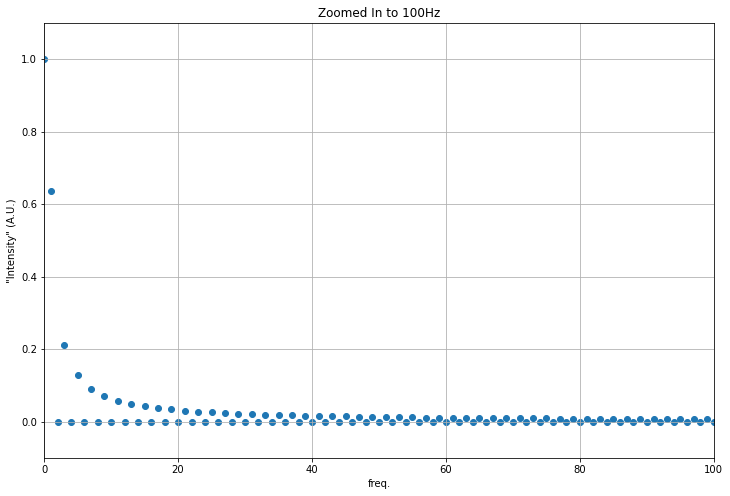

In [53]:
fig=plt.figure(figsize=(12,8))
plt.scatter(xf_pos, np.abs(yf_scaled))

plt.xlabel('freq.')
plt.ylabel('"Intensity" (A.U.)')
plt.grid()
plt.axis([0, 100, -0.1, 1.1])
plt.title('Zoomed In to 100Hz')

Text(0.5, 1.0, 'Zoomed In to 100Hz')

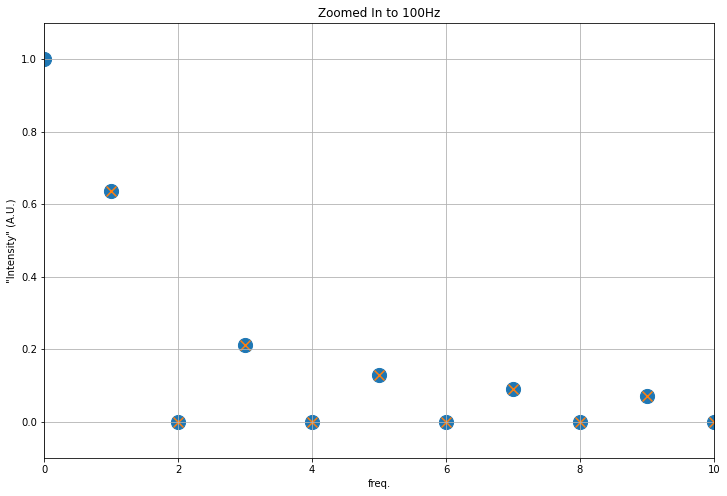

In [86]:
fig=plt.figure(figsize=(12,8))

plt.scatter(xf_pos, np.abs(yf_scaled), marker='o', s=200)

coeffs = (1/(np.pi*xf_pos[1:])*(np.cos(xf_pos[1:]*np.pi)-1))
plt.scatter(xf_pos[1:], np.abs(coeffs), marker='x', s=100)

plt.xlabel('freq.')
plt.ylabel('"Intensity" (A.U.)')
plt.grid()
plt.axis([0, 10, -0.1, 1.1])
plt.title('Zoomed In to 100Hz')

In [64]:
print(1/(np.pi*xf_pos[1:])*(np.cos(xf_pos[1:]*np.pi)-1))

[-6.36619772e-01  0.00000000e+00 -2.12206591e-01 ... -1.27400395e-04
  0.00000000e+00 -1.27349424e-04]
